<center><h1> Credit Card Fraud Detection </h1></center>
<br>
<center><name>model by Priyanshu Sinha </name><center>

<hr>
<h2> 1) Importing Library <br> <br></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.preprocessing import normalize, scale
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_curve, classification_report, roc_auc_score, auc
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings('ignore')

<hr><h2> 2) Data Preprocessing </h2>

<h3><br>Data Collection <br> <br></h3>

In [2]:
credit_card = pd.read_csv('../Dataset/creditcard.csv')
credit_card.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


<h3> <br>Data Cleaning<br></h3>

<h4>1 ) Missing Value - Checking and Correction <br> </h4>

In [3]:
credit_card.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<p> <br> Note: There is no missing value in it <p>

<h4> 2 ) Cleaning data and splitting  - Checking and Removing </h4>

In [4]:
credit_card = credit_card.iloc[:, 1:]    #dropping columns
x = credit_card.iloc[:, :-1]  # x columns
y = credit_card.iloc[:, [-1]] # y columns

<h4> <br>3 ) Outliers- Checking and Removing </h4>

In [5]:
x.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


<p> Note: There is scalling issue which need to be corrected later but first we need to treat outliers</p>

<h5> Checking Outliers </h5>

In [6]:
credit_cols = ['All'] + list(credit_card.columns)
@interact
def boxplotCreditCard(columns = credit_cols):
    if columns == 'All':
        return sb.boxplot(credit_card.loc[:, :], 
                            orient = 'h',
                            notch = True,
                            flierprops = {'marker': 'x'},
                            boxprops={"facecolor": (.4, .6, .8, .5)},
                            medianprops={"color": "coral"})
    else:
        return sb.boxplot(x = credit_card.loc[:, columns],
                            orient = 'h',
                            notch = True,
                            flierprops = {'marker': 'x'},
                            boxprops={"facecolor": (.4, .6, .8, .5)},
                            medianprops={"color": "coral"})

interactive(children=(Dropdown(description='columns', options=('All', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7'…

<h5> Removing Outliers </h5>

In [7]:
x = x.apply(winsorize, limits = (0.03, 0.09), axis = 0)

x.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,0.078872,-0.009903,0.002669,-0.104376,-0.048278,-0.115337,-0.025174,0.024186,-0.057038,-0.056791,...,-0.040507,-0.030046,-0.013219,-0.018305,-0.010517,-0.010762,-0.018433,-0.005099,-0.003572,55.790221
std,1.555226,1.010431,1.256340,1.116778,0.933844,0.901223,0.756099,0.516177,0.903450,0.735636,...,0.294664,0.275486,0.639819,0.239630,0.559356,0.440083,0.419745,0.192707,0.140230,70.859875
min,-3.864514,-2.677973,-2.809162,-2.528817,-1.999166,-1.607550,-1.756144,-1.696453,-2.023983,-1.561554,...,-0.737477,-0.683002,-1.270543,-0.612718,-1.361242,-1.009507,-0.801703,-0.614952,-0.461512,0.770000
25%,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,-0.535426,...,-0.211721,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000
50%,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,-0.092917,...,-0.062481,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000
75%,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,0.453923,...,0.133041,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000
max,2.030381,1.391036,1.734573,1.574875,1.505009,1.697983,1.087304,0.808431,1.372010,1.223725,...,0.494711,0.398805,0.949107,0.353759,0.722898,0.625023,0.721718,0.283037,0.192040,225.000000


In [8]:
x_cols = ['all'] + list(x.columns)
@interact
def boxplotCreditCard(columns = x_cols):
    if columns == 'all':
        return sb.boxplot(x.loc[:, :], 
                            orient = 'h',
                            notch = True,
                            flierprops = {'marker': 'x'},
                            boxprops={"facecolor": (.4, .6, .8, .5)},
                            medianprops={"color": "coral"})
    else:
        return sb.boxplot(x = x.loc[:, columns],
                            orient = 'h',
                            notch = True,
                            flierprops = {'marker': 'x'},
                            boxprops={"facecolor": (.4, .6, .8, .5)},
                            medianprops={"color": "coral"})

interactive(children=(Dropdown(description='columns', options=('all', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7'…

<h3> <br> - Standardization </h3>

In [9]:
x = x.apply(scale)
x.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,2.993786e-18,1.596686e-17,1.117680e-17,-1.836189e-17,-4.630389e-17,-4.311052e-17,2.075692e-17,1.227452e-17,1.965920e-17,3.552626e-17,...,5.588401e-18,-2.913952e-17,-2.315195e-17,-1.756355e-17,5.887780e-18,6.546413e-17,1.756355e-17,-9.954339e-18,2.335153e-17,-9.899453e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.535575e+00,-2.640532e+00,-2.238117e+00,-2.170928e+00,-2.089098e+00,-1.655767e+00,-2.289346e+00,-3.333431e+00,-2.177153e+00,-2.045530e+00,...,-2.365310e+00,-2.370200e+00,-1.965127e+00,-2.480553e+00,-2.414788e+00,-2.269453e+00,-1.866069e+00,-3.164662e+00,-3.265652e+00,-7.764665e-01
25%,-6.425092e-01,-5.825714e-01,-7.108231e-01,-6.664396e-01,-6.888948e-01,-7.245263e-01,-6.995146e-01,-4.510393e-01,-6.486923e-01,-6.506416e-01,...,-5.810521e-01,-7.199974e-01,-8.270031e-01,-5.990147e-01,-6.151165e-01,-6.961951e-01,-7.350942e-01,-3.411398e-01,-3.521933e-01,-7.083037e-01
50%,-3.907040e-02,7.461038e-02,1.410266e-01,7.569086e-02,-6.487075e-03,-1.762609e-01,8.633468e-02,-3.541574e-03,6.208186e-03,-4.910893e-02,...,-7.457518e-02,2.163125e-03,3.125978e-02,2.967952e-02,9.205877e-02,6.216066e-02,-8.030230e-02,3.342713e-02,1.056540e-01,-4.768606e-01
75%,7.952361e-01,8.052291e-01,8.154862e-01,7.590756e-01,7.069762e-01,5.702283e-01,7.877425e-01,5.873180e-01,7.240884e-01,6.942502e-01,...,5.889679e-01,7.856067e-01,8.467595e-01,6.925164e-01,8.045765e-01,8.213878e-01,6.179601e-01,4.989160e-01,5.837004e-01,3.016491e-01
max,1.254809e+00,1.386479e+00,1.378534e+00,1.503659e+00,1.663329e+00,2.012069e+00,1.471342e+00,1.519335e+00,1.581770e+00,1.740695e+00,...,1.816367e+00,1.556711e+00,1.504060e+00,1.552667e+00,1.311180e+00,1.444698e+00,1.763340e+00,1.495205e+00,1.394944e+00,2.387953e+00


<h3> <br>Treating Imbalanced Data- SMOTE</h3>

<Axes: xlabel='Class'>

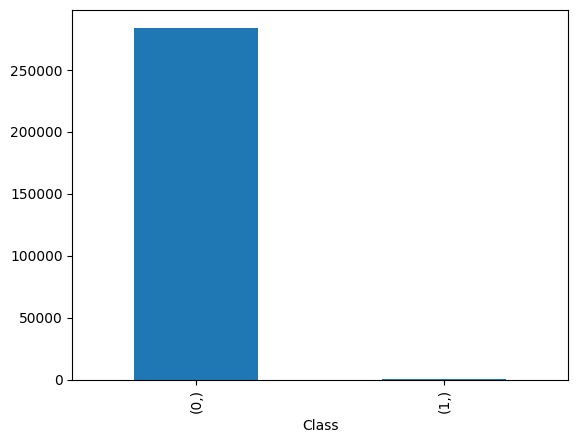

In [10]:
y.value_counts().plot(kind='bar')

In [11]:
y['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: xlabel='Class'>

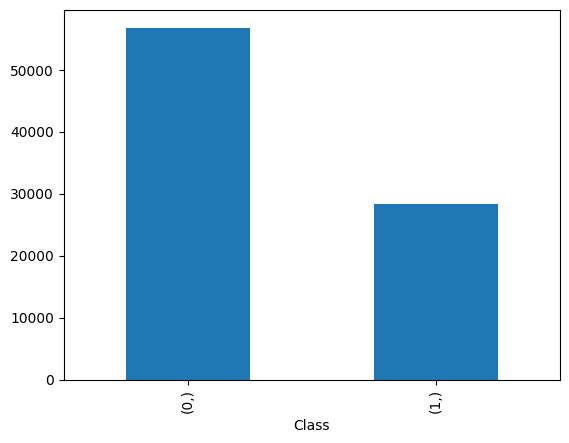

In [12]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
x, y = pipeline.fit_resample(x, y)

y.value_counts().plot(kind='bar')

In [13]:
y.value_counts()

Class
0        56862
1        28431
Name: count, dtype: int64

In [14]:
x.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,85293.000000,85293.000000,85293.000000,85293.000000,85293.000000,85293.000000,85293.000000,85293.000000,85293.000000,85293.000000,...,85293.000000,85293.000000,85293.000000,85293.000000,85293.000000,85293.000000,85293.000000,85293.000000,85293.000000,85293.000000
mean,-0.431934,0.350894,-0.600241,0.460602,-0.308363,-0.307220,-0.524675,0.116256,-0.489005,-0.580401,...,0.194939,0.246347,0.004134,-0.077992,-0.057607,0.036700,0.048302,0.128353,0.056637,0.024841
std,1.238412,1.055316,1.266280,1.060429,1.197911,1.075356,1.305044,1.222084,1.211143,1.241508,...,1.161237,1.160469,1.004697,1.136632,0.942162,1.020787,0.965852,1.269035,1.262345,1.034374
min,-2.535575,-2.640532,-2.238117,-2.170928,-2.089098,-1.655767,-2.289346,-3.333431,-2.177153,-2.045530,...,-2.365310,-2.370200,-1.965127,-2.480553,-2.414788,-2.269453,-1.866069,-3.164662,-3.265652,-0.776466
25%,-1.265153,-0.304077,-2.085086,-0.349961,-1.307261,-1.194989,-2.077679,-0.425391,-1.660826,-2.045530,...,-0.522926,-0.601220,-0.801230,-0.766382,-0.651640,-0.667879,-0.649351,-0.311960,-0.351717,-0.744996
50%,-0.358105,0.577199,-0.486585,0.661165,-0.243517,-0.452607,-0.359642,0.150335,-0.371683,-0.505332,...,0.102618,0.355091,0.047227,-0.023313,0.041598,0.126039,-0.010640,0.178052,0.204028,-0.505085
75%,0.695833,1.386479,0.502150,1.503659,0.611721,0.315340,0.545934,1.193417,0.433459,0.282139,...,1.212945,1.517731,0.851329,0.773857,0.694790,0.886633,0.730126,1.363328,1.092405,0.482640
max,1.254809,1.386479,1.378534,1.503659,1.663329,2.012069,1.471342,1.519335,1.581770,1.740695,...,1.816367,1.556711,1.504060,1.552667,1.311180,1.444698,1.763340,1.495205,1.394944,2.387953


<<h3><br>Feature Importance </h3>

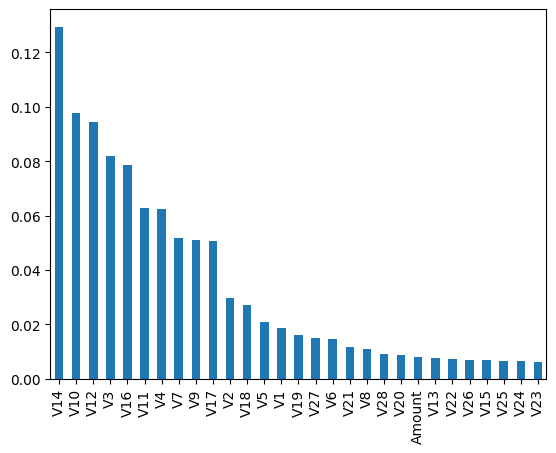

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
imp = feat_importances.nlargest(len(x.columns))
imp.plot(kind='bar')
plt.show()
feat_imp_cols = dict(imp)
feat_imp_cols = list(feat_imp_cols.keys())
x = x.loc[:, feat_imp_cols[:13]]

<h3>PCA</h3>

In [16]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=5)
# x = pca.fit_transform(x)
# x = pd.DataFrame(x)

<p> Note: Data preprocessing is done, now moving towards EDA </p>

<hr><h2> 3) Exploratary Data Analysis (EDA) </h2>

<h3> <br> Measure of Central Tendency- Mean, Median, Mode </h3>

In [17]:
print('Mean', x.mean(), '\n')
print('Median', x.median(), '\n')
print('Mode', x.mode(), '\n')

Mean V14   -0.761147
V10   -0.580401
V12   -0.789569
V3    -0.600241
V16   -0.576821
V11    0.439368
V4     0.460602
V7    -0.524675
V9    -0.489005
V17   -0.377738
V2     0.350894
V18   -0.376786
V5    -0.308363
dtype: float64 

Median V14   -0.486449
V10   -0.505332
V12   -0.336625
V3    -0.486585
V16   -0.322885
V11    0.669275
V4     0.661165
V7    -0.359642
V9    -0.371683
V17   -0.451753
V2     0.577199
V18   -0.223134
V5    -0.243517
dtype: float64 

Mode         V14      V10       V12        V3       V16       V11        V4   
0 -2.528114 -2.04553 -2.820093 -2.238117 -2.421922  1.527354  1.503659  \

         V7        V9       V17        V2       V18        V5  
0 -2.289346 -2.177153 -1.831322  1.386479 -2.273574 -2.089098   



<h3> <br> Measure of Variance- Range, IQR, Std, Variance</h3>

In [18]:
result = x.describe()
result

,V14,V10,V12,V3,V16,V11,V4,V7,V9,V17,V2,V18,V5
count,85293.000000,85293.000000,85293.000000,85293.000000,85293.000000,85293.000000,85293.000000,85293.000000,85293.000000,85293.000000,85293.000000,85293.000000,85293.000000
mean,-0.761147,-0.580401,-0.789569,-0.600241,-0.576821,0.439368,0.460602,-0.524675,-0.489005,-0.377738,0.350894,-0.376786,-0.308363
std,1.415802,1.241508,1.501729,1.266280,1.365171,1.075925,1.060429,1.305044,1.211143,1.231661,1.055316,1.265741,1.197911
min,-2.528114,-2.045530,-2.820093,-2.238117,-2.421922,-1.877124,-2.170928,-2.289346,-2.177153,-1.831322,-2.640532,-2.273574,-2.089098
25%,-2.528114,-2.045530,-2.820093,-2.085086,-2.393228,-0.452056,-0.349961,-2.077679,-1.660826,-1.831322,-0.304077,-1.478063,-1.307261
50%,-0.486449,-0.505332,-0.336625,-0.486585,-0.322885,0.669275,0.661165,-0.359642,-0.371683,-0.451753,0.577199,-0.223134,-0.243517
75%,0.417591,0.282139,0.475503,0.502150,0.560612,1.527354,1.503659,0.545934,0.433459,0.616691,1.386479,0.608831,0.611721
max,1.480015,1.740695,1.245667,1.378534,1.446402,1.527354,1.503659,1.471342,1.581770,1.703732,1.386479,1.551893,1.663329


In [19]:
rangee = result.loc['max'] - result.loc['max']
print((result.loc['min'], '\n', result.loc['max']), '\n')
print('range', rangee)

(V14   -2.528114
V10   -2.045530
V12   -2.820093
V3    -2.238117
V16   -2.421922
V11   -1.877124
V4    -2.170928
V7    -2.289346
V9    -2.177153
V17   -1.831322
V2    -2.640532
V18   -2.273574
V5    -2.089098
Name: min, dtype: float64, '\n', V14    1.480015
V10    1.740695
V12    1.245667
V3     1.378534
V16    1.446402
V11    1.527354
V4     1.503659
V7     1.471342
V9     1.581770
V17    1.703732
V2     1.386479
V18    1.551893
V5     1.663329
Name: max, dtype: float64) 

range V14    0.0
V10    0.0
V12    0.0
V3     0.0
V16    0.0
V11    0.0
V4     0.0
V7     0.0
V9     0.0
V17    0.0
V2     0.0
V18    0.0
V5     0.0
Name: max, dtype: float64


In [20]:
x.var()

V14    2.004496
V10    1.541341
V12    2.255191
V3     1.603465
V16    1.863692
V11    1.157615
V4     1.124510
V7     1.703140
V9     1.466868
V17    1.516990
V2     1.113691
V18    1.602099
V5     1.434991
dtype: float64

In [21]:
iqr = result.loc['75%'] - result.loc['25%']
iqr

V14    2.945705
V10    2.327669
V12    3.295597
V3     2.587236
V16    2.953841
V11    1.979410
V4     1.853620
V7     2.623612
V9     2.094285
V17    2.448013
V2     1.690557
V18    2.086894
V5     1.918982
dtype: float64

<h3> <br> Skewness</h3>

In [22]:
x_cols = ['all'] + list(x.columns)
@interact
def violinplotCreditCard(columns = x_cols):
    if columns == 'all':
        return sb.violinplot(x.loc[:, :], 
                            orient = 'h')
    else:
        return sb.violinplot(x = x.loc[:, columns],
                            orient = 'h')

interactive(children=(Dropdown(description='columns', options=('all', 'V14', 'V10', 'V12', 'V3', 'V16', 'V11',…

In [23]:
x.skew()

V14   -0.045109
V10    0.267402
V12   -0.299945
V3     0.008905
V16   -0.149693
V11   -0.535948
V4    -0.721624
V7    -0.079728
V9     0.027295
V17    0.267993
V2    -0.931273
V18   -0.146553
V5    -0.019592
dtype: float64

In [24]:
x_cols = ['all'] + list(x.columns)
@interact
def kdeplotCreditCard(columns = x_cols):
    if columns == 'all':
        return sb.kdeplot(x.loc[:, :], 
                        fill = True,
                        common_norm = False,
                        palette = "crest",
                        alpha= .5,
                        linewidth = 0)
    else:
        return sb.kdeplot(x = x.loc[:, columns],
                        fill = True,
                        common_norm = False,
                        alpha= .5,
                        linewidth = 0)

interactive(children=(Dropdown(description='columns', options=('all', 'V14', 'V10', 'V12', 'V3', 'V16', 'V11',…

<h3> <br> Kurtosis</h3>

In [25]:
x.kurt()

V14   -1.439323
V10   -1.106027
V12   -1.466939
V3    -1.410521
V16   -1.384449
V11   -1.037653
V4    -0.544002
V7    -1.349194
V9    -1.159152
V17   -1.247582
V2     0.191908
V18   -1.177257
V5    -1.111337
dtype: float64

<h3> <br> Correlation</h3>

In [26]:
x.corr()

,V14,V10,V12,V3,V16,V11,V4,V7,V9,V17,V2,V18,V5
V14,1.000000,0.584016,0.583217,0.557627,0.472423,-0.443838,-0.451848,0.520770,0.485873,0.323220,-0.394582,0.361507,0.327414
V10,0.584016,1.000000,0.538328,0.510490,0.472670,-0.433674,-0.417028,0.396816,0.310230,0.339637,-0.468472,0.349732,0.271654
V12,0.583217,0.538328,1.000000,0.575880,0.567219,-0.465937,-0.443002,0.570576,0.536312,0.413744,-0.405081,0.445677,0.380024
V3,0.557627,0.510490,0.575880,1.000000,0.499900,-0.432367,-0.411301,0.473459,0.471863,0.383431,-0.323321,0.367423,0.239314
V16,0.472423,0.472670,0.567219,0.499900,1.000000,-0.396362,-0.393340,0.525392,0.468080,0.455330,-0.292284,0.523709,0.470976
V11,-0.443838,-0.433674,-0.465937,-0.432367,-0.396362,1.000000,0.368758,-0.414856,-0.418345,-0.308215,0.324203,-0.303050,-0.271914
V4,-0.451848,-0.417028,-0.443002,-0.411301,-0.393340,0.368758,1.000000,-0.350564,-0.325368,-0.277674,0.397313,-0.278799,-0.239111
V7,0.520770,0.396816,0.570576,0.473459,0.525392,-0.414856,-0.350564,1.000000,0.431811,0.428241,-0.186082,0.447123,0.564258
V9,0.485873,0.310230,0.536312,0.471863,0.468080,-0.418345,-0.325368,0.431811,1.000000,0.365337,-0.365811,0.372981,0.302231
V17,0.323220,0.339637,0.413744,0.383431,0.455330,-0.308215,-0.277674,0.428241,0.365337,1.000000,-0.293426,0.422172,0.364956


<Axes: >

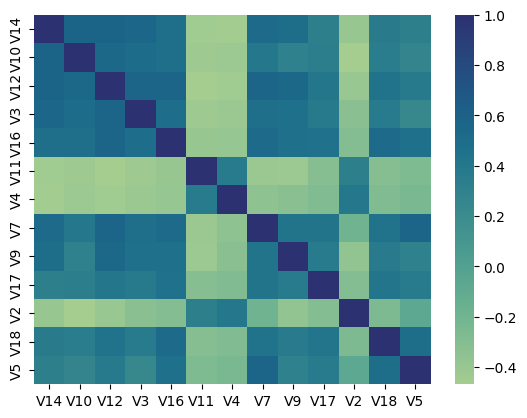

In [27]:
sb.heatmap(x.corr(), fmt = '.1f', cmap = 'crest')

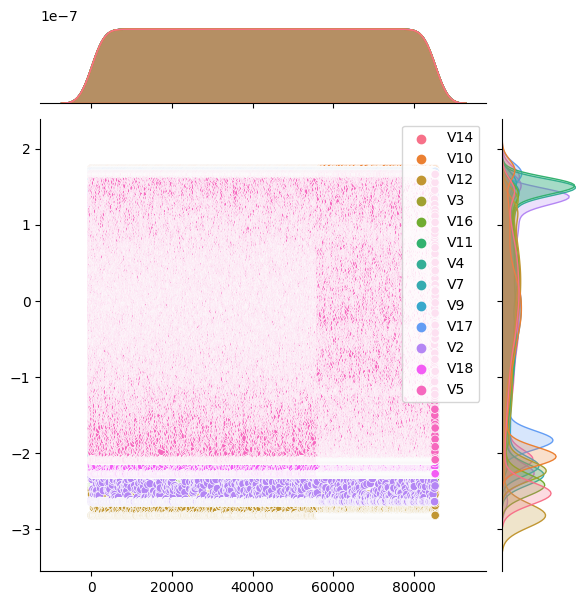

In [28]:
sb.jointplot(x)

<hr><h2> 4) Model Building </h2>

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
store = dict({})

In [30]:
svm = SVC(kernel = 'linear')
svm.fit(x_train, y_train)
y_test_pred = svm.predict(x_test)
y_train_pred = svm.predict(x_train)

store['SVC Linear'] = {
    'actual': {
        'Train' : y_train,
        'Test': y_test},
    'predicted': {
        'Train': y_train_pred,
        'Test': y_test_pred
    }
}

In [31]:
svm = SVC(kernel = 'poly')
svm.fit(x_train, y_train)
y_test_pred = svm.predict(x_test)
y_train_pred = svm.predict(x_train)

store['SVC Poly'] = {
    'actual':{
        'Train' : y_train,
        'Test': y_test},
    'predicted': {
        'Train': y_train_pred,
        'Test': y_test_pred
    }
}

In [32]:
svm = SVC(kernel = 'rbf')
svm.fit(x_train, y_train)
y_test_pred = svm.predict(x_test)
y_train_pred = svm.predict(x_train)

store['SVC RBF'] = {
    'actual': {
        'Train' : y_train,
        'Test': y_test},
    'predicted': {
        'Train': y_train_pred,
        'Test': y_test_pred
    }
}

In [33]:
svm = SVC(kernel = 'sigmoid')
svm.fit(x_train, y_train)
y_test_pred = svm.predict(x_test)
y_train_pred = svm.predict(x_train)

store['SVC Sigmoid'] = {
    'actual': {
        'Train' : y_train,
        'Test': y_test},
    'predicted': {
        'Train': y_train_pred,
        'Test': y_test_pred
    }
}

In [34]:
logr = LogisticRegression(random_state = 0, solver = 'newton-cg')
logr.fit(x_train, y_train)
y_train_pred = logr.predict(x_train)
y_test_pred = logr.predict(x_test)

store['Logistic Regression Newton-cg'] = {
    'actual': {
        'Train' : y_train,
        'Test': y_test},
    'predicted': {
        'Train': y_train_pred,
        'Test': y_test_pred
    }
}

<hr><h2> 5) Model Accuracy Report </h2>

In [35]:
@interact
def Report(model = ['SVC Linear', 'SVC Poly', 'SVC RBF', 'SVC Sigmoid', 'Logistic Regression Newton-cg'], 
           choice = ['Train', 'Test'] , 
           metrics = ['Confusion Matrix', 'ROC Curve', 
                      'Classification Report']):
    y_train = store[model]['actual']['Train']
    y_test = store[model]['actual']['Test']
    y_train_pred = store[model]['predicted']['Train']
    y_test_pred = store[model]['predicted']['Test']
    if metrics == 'Confusion Matrix':
            if choice == 'Train':
                print('Accuracy: ',accuracy_score(y_train, y_train_pred))
                return ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_train, y_train_pred)).plot()
            if choice == 'Test':
                print('Accuracy: ', accuracy_score(y_test, y_test_pred))
                return ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_test, y_test_pred)).plot()
                
    if metrics == 'Classification Report':
            if choice == 'Train':
                return print(classification_report(y_train, y_train_pred))
            if choice == 'Test':
                return print(classification_report(y_test, y_test_pred))
    if metrics == 'ROC Curve':
            if choice == 'Train':
                fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
                plt.plot(tpr, color = 'red')
                plt.plot(1-fpr, color = 'blue')
                print('Accuracy: ',auc(fpr, tpr))
            if choice == 'Test':
                fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
                plt.plot(tpr, color = 'red')
                plt.plot(1-fpr, color = 'blue')
                print('Accuracy: ',auc(fpr, tpr))
    

interactive(children=(Dropdown(description='model', options=('SVC Linear', 'SVC Poly', 'SVC RBF', 'SVC Sigmoid…

<hr><h2> 6) Final Model Selection </h2>

0.9840874697602235


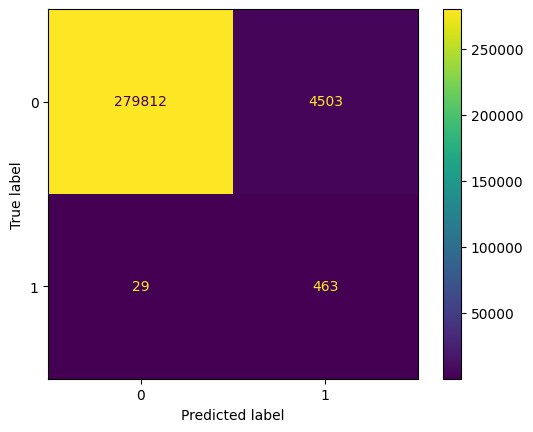

In [36]:
svm = SVC(kernel = 'rbf')
svm.fit(x_train, y_train)

y_act = credit_card.iloc[: , [-1]]
x_act = credit_card.loc[: , feat_imp_cols[:13]]
x_act = x_act.apply(scale) 
x_act = x_act.apply(winsorize, limits = (0.03, 0.09), axis = 0)
y_pred_cc = svm.predict(x_act)
print(accuracy_score(y_act, y_pred_cc))
ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_act, y_pred_cc)).plot()

<hr><h2> 7) Conclusion </h2>

<p> Different model were tested for the Credit card dataset but most accurate model found is SVC RBF. I'd also applied PCA but result was poor. As of now, the best possible way to make model is written above. There is no other way to generate model better than that.</p>